# Download dataset

In [2]:
!pip install SoccerNet

  Using cached pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached Babel-2.14.0-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 1.7 MB/s eta 0:00:00a 0:00:01
Using cached google_measurement_protocol-1.1.0-py2.py3-none-any.whl (5.9 kB)
Using cached pycocoevalcap-1.2-py3-none-any.whl (104.3 MB)
Using cached scikit_video-1.1.11-py2.py3-none-any.whl (2.3 MB)
Using cached prices-1.1.1-py3-none-any.whl (9.5 kB)
Using cached pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (426 kB)
Using cached Babel-2.14.0-py3-none-any.whl (11.0 MB)


In [3]:
%cd data/jersey-2023/

from SoccerNet.Downloader import SoccerNetDownloader as SNdl

mySNdl = SNdl(LocalDirectory="./data")
mySNdl.downloadDataTask(task="jersey-2023", split=["train","test","challenge"])

[Errno 2] No such file or directory: 'data/jersey-2023/'
/home/chrenx/eecs545-sn-jersey/data/jersey-2023


In [4]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch

In [11]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
train_dataset = datasets.ImageFolder(
        "testing/tiny-imagenet-200",
        transforms.Compose([
            transforms.RandomResizedCrop(32),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
        ]))

train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=64, shuffle=True,
        num_workers=1, pin_memory=True)

In [12]:
a = next(iter(train_loader))   
a[0].shape, a[1].shape

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

# Testing

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import torch
from model.mnist_network import MnistPadding
import torchvision
from torchvision import transforms
from torchvision.io import read_image
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
model = MnistPadding().to(device)  # B, C, 210, 210

ckpt = torch.load("mnist/mnist_model_padding_ckpt_E9.pth")
model.load_state_dict(ckpt['model_state_dict'])


<All keys matched successfully>

In [84]:
transform = transforms.Compose([

    # transforms.CenterCrop(26),
    # transforms.Resize((150,150)),
    # transforms.Resize((250, 250)),
    # transforms.Pad(80),
    transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
    transforms.Grayscale(1),
    # transforms.RandomRotation(10),      
    # transforms.RandomAffine(5),
    # transforms.RandomPerspective(distortion_scale=0.65, p=0.8),
    # transforms.ElasticTransform(),
    # transforms.GaussianBlur(kernel_size=(3,3)),
    transforms.Resize((64,64)),

    # convert the image to a pytorch tensor
    # transforms.ToTensor(), 

# # normalise the images with mean and std of the dataset
# transforms.Normalize((0.1307,), (0.3081,)) 
])

(<matplotlib.image.AxesImage at 0x795df5cf6590>, torch.Size([3, 92, 36]))

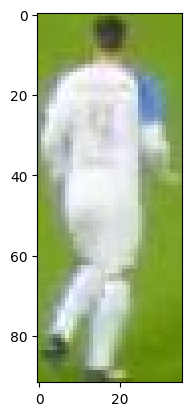

In [87]:
# img_dir = "data/jersey-2023/train/images/6/6_350.jpg"   # 8
# img_dir = "data/jersey-2023/train/images/9/9_51.jpg"    # -1
# img_dir = "data/jersey-2023/train/images/2/2_8.jpg"   #   27
# img_dir = "data/jersey-2023/train/images/6/6_345.jpg"  # 8
# img_dir = "data/jersey-2023/train/images/10/10_26.jpg"  # 3
img_dir = "data/jersey-2023/train/images/20/20_201.jpg"  # 4

ori_img = read_image(img_dir)
plt.imshow(ori_img.permute(1,2,0)), ori_img.shape

(torch.Size([1, 64, 64]), torch.float32, device(type='cuda', index=0))

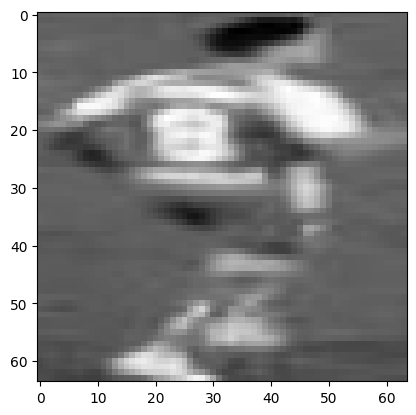

In [81]:
img_dir = "data/jersey-2023/train/images/6/6_350.jpg"   # 8
# img_dir = "data/jersey-2023/train/images/9/9_51.jpg"    # -1
# img_dir = "data/jersey-2023/train/images/2/2_8.jpg"   #   27
# img_dir = "data/jersey-2023/train/images/6/6_345.jpg"  # 8
# img_dir = "data/jersey-2023/train/images/10/10_26.jpg"  # 3
# img_dir = "data/jersey-2023/train/images/20/20_201.jpg"  # 4

ori_img = read_image(img_dir)
img = transform(ori_img)
img = img.float()
plt.imshow(img.permute(1,2,0), cmap='gray')
img = img.to(device)
img.shape, img.dtype, img.device

In [54]:

model.eval()
with torch.no_grad():
    output = model(img.unsqueeze(0))
    pred = output.argmax(dim=1, keepdim=True)
    print(output)
    print(pred)

tensor([[-316.2349, -787.7780, -322.0289, -458.9216, -224.8711, -299.7875,
         -272.8350, -516.2353,    0.0000, -303.0577]], device='cuda:0')
tensor([[8]], device='cuda:0')


In [65]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 8990410


In [57]:
from model.mnist_network import MnistDistorted28

mnist_distorted28 = MnistDistorted28()

ckpt = torch.load("mnist/mnist_model_distored28_ckpt_E99.pth")
mnist_distorted28.load_state_dict(ckpt['model_state_dict'])
mnist_distorted28.to(device)


MnistDistorted28(
  (conv11): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv12): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv13): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1))
  (conv14): Conv2d(1, 16, kernel_size=(9, 9), stride=(1, 1))
  (conv21): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv22): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv23): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1))
  (conv24): Conv2d(16, 32, kernel_size=(9, 9), stride=(1, 1))
  (conv31): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv32): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv33): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  (conv34): Conv2d(32, 64, kernel_size=(9, 9), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc11): Linear(in_features=7744, out_features=256, bias=True)
 

(torch.Size([1, 28, 28]), torch.float32, device(type='cuda', index=0))

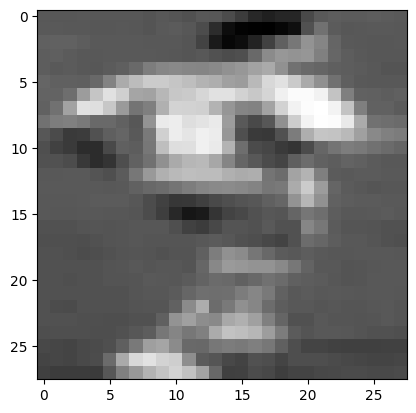

In [66]:
transform = transforms.Compose([

    # transforms.CenterCrop(50),
    # transforms.Resize((150,150)),
    # transforms.Resize((250, 250)),
    # transforms.Pad(80),
    transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
    transforms.Grayscale(1),
    # transforms.RandomRotation(10),      
    # transforms.RandomAffine(5),
    # transforms.RandomPerspective(distortion_scale=0.65, p=0.8),
    # transforms.ElasticTransform(),
    # transforms.GaussianBlur(kernel_size=(3,3)),
    transforms.Resize((28,28)),

    # convert the image to a pytorch tensor
    # transforms.ToTensor(), 

# # normalise the images with mean and std of the dataset
# transforms.Normalize((0.1307,), (0.3081,)) 
])
img_dir = "data/jersey-2023/train/images/6/6_350.jpg"   # 8
# img_dir = "data/jersey-2023/train/images/9/9_51.jpg"    # -1
# img_dir = "data/jersey-2023/train/images/2/2_8.jpg"   #   27
# img_dir = "data/jersey-2023/train/images/6/6_345.jpg"  # 8
# img_dir = "data/jersey-2023/train/images/10/10_26.jpg"  # 3
# img_dir = "data/jersey-2023/train/images/20/20_201.jpg"  # 4

ori_img = read_image(img_dir)
img = transform(ori_img)
img = img.float()
plt.imshow(img.permute(1,2,0), cmap='gray')
img = img.to(device)
img.shape, img.dtype, img.device

In [67]:
mnist_distorted28.eval()
with torch.no_grad():
    output = mnist_distorted28(img.unsqueeze(0))
    pred = output.argmax(dim=1, keepdim=True)
    print(output)
    print(pred)

tensor([[   0.0000, -271.0093, -628.9890, -735.0399, -619.6136, -664.5666,
         -970.2014, -513.9344, -556.1673, -499.3082]], device='cuda:0')
tensor([[0]], device='cuda:0')


# Testing EfficientNet

In [68]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')


Using cuda for inference


In [69]:
efficientnet = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b0', pretrained=True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

efficientnet.eval().to(device)



Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /home/chrenx/.cache/torch/hub/torchhub.zip
Downloading: "https://api.ngc.nvidia.com/v2/models/nvidia/efficientnet_b0_pyt_amp/versions/20.12.0/files/nvidia_efficientnet-b0_210412.pth" to /home/chrenx/.cache/torch/hub/checkpoints/nvidia_efficientnet-b0_210412.pth
100.0%
Using cache found in /home/chrenx/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


EfficientNet(
  (stem): Sequential(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (activation): SiLU(inplace=True)
  )
  (layers): Sequential(
    (0): Sequential(
      (block0): MBConvBlock(
        (depsep): Sequential(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (se): SequentialSqueezeAndExcitation(
          (squeeze): Linear(in_features=32, out_features=8, bias=True)
          (expand): Linear(in_features=8, out_features=32, bias=True)
          (activation): SiLU(inplace=True)
          (sigmoid): Sigmoid()
          (mul_a_quantizer): Identity()
          (mul_b_quantizer): Identity()
        )
      

In [75]:
input_img = ori_img.unsqueeze(0).to(device)
input_img = input_img.float()
with torch.no_grad():
    output = torch.nn.functional.softmax(efficientnet(input_img), dim=1)
    
results = utils.pick_n_best(predictions=output, n=5)

# img = Image.open(ori_img)
# img.thumbnail((256,256), Image.ANTIALIAS)
# plt.imshow(img)
# plt.show()
print(results)

sample 0: [('Chihuahua', '100.0%'), ('bucket, pail', '0.0%'), ('Labrador retriever', '0.0%'), ('vizsla, Hungarian pointer', '0.0%'), ('American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier', '0.0%')]
[[('Chihuahua', '100.0%'), ('bucket, pail', '0.0%'), ('Labrador retriever', '0.0%'), ('vizsla, Hungarian pointer', '0.0%'), ('American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier', '0.0%')]]


# Testing yolo model

In [3]:
%cd ~/eecs545-sn-jersey/

/home/chrenx/eecs545-sn-jersey


In [1]:
from ultralytics import YOLO
from argparse import ArgumentParser

pretrained_model_path = "yolo-bb/best-03-25.pt"

# Load a model
# model = YOLO('yolov8s-obb.yaml')  # build a new model from YAML
# model = YOLO('yolov8s-obb.pt')  # load a pretrained model (recommended for training)
model = YOLO(pretrained_model_path)  # build from YAML and transfer weights


In [4]:

img0 = '/home/chrenx/eecs545-sn-jersey/data/jersey-2023-cleaned/train/images/0/0_1.jpg'
img1 = '/home/chrenx/eecs545-sn-jersey/data/jersey-2023-cleaned/train/images/47/47_183.jpg'
# img2 = 'yolo-bb/datasets/valid/images/cga_cacique_new_out_1_6_jpg.rf.07a1595320b0753168da949410943cfd.jpg'
# sn_img1 = 'data/jersey-2023/test/images/0/0_1.jpg'
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# model.predict(img1, save=True, save_txt=True, conf=0.5, classes=classes)
results = model.predict([img0, img1], save=True, conf=0.60)


0: 640x640 66.1ms
1: 640x640 66.1ms
Speed: 3.4ms preprocess, 66.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/obb/predict


In [6]:
results[1].obb

ultralytics.engine.results.OBB object with attributes:

cls: tensor([5.])
conf: tensor([0.9156])
data: tensor([[54.5031, 36.1438, 21.9648, 19.7681,  1.5685,  0.9156,  5.0000]])
id: None
is_track: False
orig_shape: (115, 78)
shape: torch.Size([1, 7])
xywhr: tensor([[54.5031, 36.1438, 21.9648, 19.7681,  1.5685]])
xyxy: tensor([[44.5936, 25.1385, 64.4126, 47.1490]])
xyxyxyxy: tensor([[[44.6445, 47.1490],
         [64.4126, 47.1032],
         [64.3616, 25.1385],
         [44.5936, 25.1843]]])
xyxyxyxyn: tensor([[[0.5724, 0.4100],
         [0.8258, 0.4096],
         [0.8251, 0.2186],
         [0.5717, 0.2190]]])

In [26]:
import torch, heapq
tmp = [23, 13, 25, 199]
q, w, e = heapq.nlargest(3, range(len(tmp)), key=tmp.__getitem__)
x = torch.Tensor([p[0] for p in results[0].obb.xyxyxyxyn[0,:]])
y = torch.Tensor([p[1] for p in results[0].obb.xyxyxyxyn[0,:]])
centroid = ((torch.sum(x) / 4).item(), (torch.sum(y) / 4).item())
results[0].obb.xyxyxyxyn[0,:], centroid, q,w,e, centroid[0]

(tensor([[0.3274, 0.3756],
         [0.5077, 0.3755],
         [0.5075, 0.2354],
         [0.3271, 0.2354]]),
 (0.4174307584762573, 0.3054835796356201),
 3,
 2,
 0,
 0.4174307584762573)

# Code For SoccerNet dataset using YOLOv8

In [1]:
%pwd
%load_ext autoreload
%autoreload 2

In [6]:
import os, json, glob
from ultralytics import YOLO
from argparse import ArgumentParser

# soccernet_train_path = 'data/jersey-2023/train'
# soccernet_test_path = 'data/jersey-2023/test'
# soccernet_challenge_path = 'data/jersey-2023/challenge'

In [14]:
parser = ArgumentParser()
parser.add_argument("--conf", type=float, default=0.8)
parser.add_argument("--mode", type=str, default='test')
parser.add_argument("--challenge", action="store_true")
parser.add_argument("--threshold", type=int, default=50)
parser.add_argument("--model_path", type=str, default='yolo-bb/best-03-25.pt')
parser.add_argument("--mv_dir", type=str, default='train')

args, unknown = parser.parse_known_args()

args.clean_dir = f'data/jersey-2023-cleaned/{args.mode}/images'
args.input_path = f'data/jersey-2023/{args.mode}'

model = YOLO(args.model_path)

In [15]:
from predict_soccernet import process_data

process_data(model, args)




  0%|          | 0/1212 [00:00<?, ?it/s]


处理tracklet:  .DS_Store

处理tracklet:  0


  0%|          | 2/1212 [00:49<8:22:55, 24.94s/it]


处理tracklet:  1


  0%|          | 3/1212 [01:26<10:04:39, 30.01s/it]

predicted:  tensor([8., 5.])
path:  data/jersey-2023/test/images/1/1_687.jpg
predicted:  tensor([8., 5.])
path:  data/jersey-2023/test/images/1/1_689.jpg
predicted:  tensor([8., 2.])
path:  data/jersey-2023/test/images/1/1_715.jpg
predicted:  tensor([8., 5.])
path:  data/jersey-2023/test/images/1/1_716.jpg
predicted:  tensor([3., 9.])
path:  data/jersey-2023/test/images/1/1_727.jpg
predicted:  tensor([3., 8.])
path:  data/jersey-2023/test/images/1/1_728.jpg
predicted:  tensor([3., 8.])
path:  data/jersey-2023/test/images/1/1_730.jpg
predicted:  tensor([8., 3.])
path:  data/jersey-2023/test/images/1/1_734.jpg
predicted:  tensor([5., 8.])
path:  data/jersey-2023/test/images/1/1_738.jpg
predicted:  tensor([8., 5.])
path:  data/jersey-2023/test/images/1/1_74.jpg
predicted:  tensor([8., 5.])
path:  data/jersey-2023/test/images/1/1_740.jpg
predicted:  tensor([8., 5.])
path:  data/jersey-2023/test/images/1/1_741.jpg
predicted:  tensor([8., 5.])
path:  data/jersey-2023/test/images/1/1_742.jpg


  0%|          | 4/1212 [02:22<13:19:25, 39.71s/it]

predicted:  tensor([3., 3.])
path:  data/jersey-2023/test/images/10/10_687.jpg
predicted:  tensor([3., 3.])
path:  data/jersey-2023/test/images/10/10_688.jpg
predicted:  tensor([3., 3.])
path:  data/jersey-2023/test/images/10/10_689.jpg
predicted:  tensor([3., 3.])
path:  data/jersey-2023/test/images/10/10_722.jpg
predicted:  tensor([3., 3.])
path:  data/jersey-2023/test/images/10/10_723.jpg
predicted:  tensor([3., 3.])
path:  data/jersey-2023/test/images/10/10_724.jpg
predicted:  tensor([3., 3.])
path:  data/jersey-2023/test/images/10/10_726.jpg
predicted:  tensor([3., 3.])
path:  data/jersey-2023/test/images/10/10_727.jpg
predicted:  tensor([0., 1.])
path:  data/jersey-2023/test/images/10/10_393.jpg
predicted:  tensor([0., 1.])
path:  data/jersey-2023/test/images/10/10_396.jpg
predicted:  tensor([0., 1.])
path:  data/jersey-2023/test/images/10/10_397.jpg
predicted:  tensor([0., 1.])
path:  data/jersey-2023/test/images/10/10_398.jpg
predicted:  tensor([0., 1.])
path:  data/jersey-2023

  0%|          | 4/1212 [02:38<13:16:12, 39.55s/it]


KeyboardInterrupt: 

In [5]:
res = model('data/jersey-2023/train/images/2/2_1.jpg', verbose=False, 
            save=True, conf=0.1)

Results saved to runs/obb/predict6


In [8]:
res[0].obb, len(res), res[0].obb.xyxyxyxyn.shape

(ultralytics.engine.results.OBB object with attributes:
 
 cls: tensor([2., 7.])
 conf: tensor([0.9219, 0.9127])
 data: tensor([[18.2909, 41.4200, 18.9908, 11.3147,  1.5712,  0.9219,  2.0000],
         [27.3356, 41.3910, 19.9120, 11.6790,  1.5760,  0.9127,  7.0000]])
 id: None
 is_track: False
 orig_shape: (133, 53)
 shape: torch.Size([2, 7])
 xywhr: tensor([[18.2909, 41.4200, 18.9908, 11.3147,  1.5712],
         [27.3356, 41.3910, 19.9120, 11.6790,  1.5760]])
 xyxy: tensor([[12.6302, 31.9225, 23.9517, 50.9174],
         [21.4442, 31.4047, 33.2270, 51.3773]])
 xyxyxyxy: tensor([[[12.6302, 50.9134],
          [23.9450, 50.9174],
          [23.9517, 31.9265],
          [12.6369, 31.9225]],
 
         [[21.4442, 51.3164],
          [33.1230, 51.3773],
          [33.2270, 31.4656],
          [21.5482, 31.4047]]])
 xyxyxyxyn: tensor([[[0.2383, 0.3828],
          [0.4518, 0.3828],
          [0.4519, 0.2400],
          [0.2384, 0.2400]],
 
         [[0.4046, 0.3858],
          [0.6250, 0.3863

In [45]:
x = torch.Tensor([p[0] for p in res[0].obb.xyxyxyxyn[0,:]])
y = torch.Tensor([p[1] for p in res[0].obb.xyxyxyxyn[0,:]])
centroid = ((torch.sum(x) / 4).item(), 
            (torch.sum(y) / 4).item())
centroid

ultralytics.engine.results.OBB object with attributes:

cls: tensor([0., 1.])
conf: tensor([0.8917, 0.8237])
data: tensor([[17.8521, 39.9711, 15.9837,  8.3684,  1.5732,  0.8917,  0.0000],
        [12.1174, 39.4163, 15.8533,  7.6543,  1.5707,  0.8237,  1.0000]])
id: None
is_track: False
orig_shape: (122, 34)
shape: torch.Size([2, 7])
xywhr: tensor([[17.8521, 39.9711, 15.9837,  8.3684,  1.5732],
        [12.1174, 39.4163, 15.8533,  7.6543,  1.5707]])
xyxy: tensor([[13.6484, 31.9691, 22.0558, 47.9731],
        [ 8.2898, 31.4894, 15.9450, 47.3432]])
xyxyxyxy: tensor([[[13.6484, 47.9527],
         [22.0168, 47.9731],
         [22.0558, 31.9895],
         [13.6874, 31.9691]],

        [[ 8.2907, 47.3432],
         [15.9450, 47.3427],
         [15.9441, 31.4894],
         [ 8.2898, 31.4899]]])
xyxyxyxyn: tensor([[[0.4014, 0.3931],
         [0.6476, 0.3932],
         [0.6487, 0.2622],
         [0.4026, 0.2620]],

        [[0.2438, 0.3881],
         [0.4690, 0.3881],
         [0.4689, 0.2581],


In [10]:

%load_ext autoreload
%autoreload 2

from filter_soccernet import filter_data
from argparse import ArgumentParser
from ultralytics import YOLO


parser = ArgumentParser()
parser.add_argument("--conf", type=float, default=0.55)
parser.add_argument("--mode", type=str, default='train')
parser.add_argument("--challenge", action="store_true")
parser.add_argument("--threshold", type=int, default=5)
parser.add_argument("--model_path", type=str, default='yolo-bb/best-03-25.pt')
parser.add_argument("--start_idx", type=int, default=156)
# args = parser.parse_args()
args, unknown = parser.parse_known_args()
args.clean_dir = f'data/jersey-2023-cleaned/{args.mode}/images'
args.input_path = f'data/jersey-2023/{args.mode}'

model = YOLO(args.model_path)

%pwd

'/home/chrenx/eecs545-sn-jersey'

In [10]:
from filter_soccernet import filter_data

# Cropped Image

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from argparse import ArgumentParser
from ultralytics import YOLO

parser = ArgumentParser()
parser.add_argument("--conf", type=float, default=0.55)
parser.add_argument("--mode", type=str, default='train')
parser.add_argument("--start_idx", type=int, default=0)
parser.add_argument("--threshold", type=int, default=5)
parser.add_argument("--model_path", type=str, default='yolo-bb/best-03-25.pt')
# args = parser.parse_args()
args, unknown = parser.parse_known_args()
args.clean_dir = f'data/jersey-2023-cleaned-crop/{args.mode}/images'
args.input_path = f'data/jersey-2023-cleaned/{args.mode}'

model = YOLO(args.model_path)             

In [5]:
from filter_cropped_soccernet import crop_data
crop_data(model, args)


  0%|          | 0/650 [00:00<?, ?it/s]

(176, 125, 3)
176


  0%|          | 0/650 [00:00<?, ?it/s]

(10, 10, 3)


In [27]:
import os, cv2, math
from tqdm import tqdm
from argparse import ArgumentParser

parser = ArgumentParser()

args, unknown = parser.parse_known_args()

args.mode = "train"

img_dir = f"yolo-bb/datasets/{args.mode}/images"
label_dir = f"yolo-bb/datasets/{args.mode}/labels"

dest_dir = f"yolo-cls/datasets/{args.mode}"

# poland_italy_raw_out_25_9_jpg.rf.35f517bc41c636876db1d451971b1d6c

max_line = 0
max_path = ""

for img_name in tqdm(os.listdir(img_dir)):
    if img_name[0] == '.':
        continue

    label_name = img_name.replace('.jpg', '.txt')

    f = open(os.path.join(label_dir, label_name))

    count_line = 0
    while True:
        content = f.readline()
        if not content:
            break
        count_line += 1
    f.close()
    if count_line > max_line:
        max_line = count_line
        max_path = os.path.join(label_dir, label_name)

print(max_line)
print(max_path)


100%|██████████| 16581/16581 [00:13<00:00, 1253.14it/s]

6
yolo-bb/datasets/train/labels/cga_cacique_out_1_3_jpg.rf.6078e3faf1b97bde0597f06937e950eb.txt


In [42]:
def a():
    return [2, 4, 5]

z,x,c = a()
z,x,c

(2, 4, 5)

# Clean Challenege Submission

In [10]:
import json

with open('predict_challenge_0327.json', 'rb') as f:
    predict_dict = json.load(f)

for key in range(1426):
    if str(key) not in predict_dict.keys():
        print(key, 'not predicted')
        predict_dict[str(key)] = -1

sorted_keys = sorted([int(key) for key in predict_dict.keys()])

In [6]:
sorted_predict = {}
for key in range(1426):
    sorted_predict[str(key)] = predict_dict[str(key)]

In [8]:
with open('predict_challenge_0330_sorted.json', 'w') as f:
    json.dump(sorted_predict, f)

# Test filter accuracy for clean folder (whether filter out those -1 folders)

In [27]:
%pwd
import json, os

def calculate_accuracy_neg1(mode):
    img_folder = f"data/jersey-2023-cleaned/{mode}/images/"
    with open(f"data/jersey-2023/{mode}/{mode}_gt.json", "rb") as f:
        gt_dict = json.load(f)
    total_num = len(gt_dict.keys())
    tracklets_list = os.listdir(img_folder) 

    # assert total_num == len(tracklets_list), \
    #        f"gt len {total_num} != {mode} len {len(tracklets_list)}"
    
    tracklets_list = sorted([int(names) for names in tracklets_list])
    tracklets_list = dict(map(lambda i: (str(i), "a"), tracklets_list))

    nonneg_recog = 0
    clean_neg1 = 0

    gt_neg1 = 0

    for key in range(total_num):
        if gt_dict[str(key)] == -1:
            gt_neg1 += 1
            if str(key) not in tracklets_list:
                clean_neg1 += 1
        else:
            if str(key) in tracklets_list:
                nonneg_recog += 1

    total_non_neg = total_num - gt_neg1
    print(f"gt_neg1: {gt_neg1}")
    print(f"clean_neg1: {clean_neg1}")
    print(f"nonneg_recog: {nonneg_recog}")
    neg_acc = "{:.2f}".format(clean_neg1 / gt_neg1 * 100)
    print(f"-1 accuracy: {neg_acc}")
    print(f"non -1 folders: {total_non_neg}")
    recog_acc = "{:.2f}".format(nonneg_recog / total_non_neg * 100)
    print(f"recog accuracy: {recog_acc}")
        

In [29]:
calculate_accuracy_neg1('train')

gt_neg1: 403
clean_neg1: 332
nonneg_recog: 579
-1 accuracy: 82.38
non -1 folders: 1024
recog accuracy: 56.54


# Double Mnist model testing...

In [1]:
%load_ext autoreload
%autoreload 2

In [105]:
from mnist.mnist_network import MnistNet
import torch

model_ckpt_path = "mnist/ckpt/best_double_mnist_20.pth"
device = "gpu" if torch.cuda.is_available() else "cpu" 
device

'cpu'

In [106]:
model = MnistNet()
ckpt = torch.load(model_ckpt_path, map_location=torch.device(device))
model.load_state_dict(ckpt['model_state_dict'])
model.to(device)


MnistNet(
  (conv11): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv12): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv13): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1))
  (conv14): Conv2d(1, 16, kernel_size=(9, 9), stride=(1, 1))
  (conv21): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv22): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv23): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1))
  (conv24): Conv2d(16, 32, kernel_size=(9, 9), stride=(1, 1))
  (conv31): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv32): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv33): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  (conv34): Conv2d(32, 64, kernel_size=(9, 9), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc11): Linear(in_features=53824, out_features=256, bias=True)
  (fc12)

torch.Size([1, 64, 64]) torch.float32


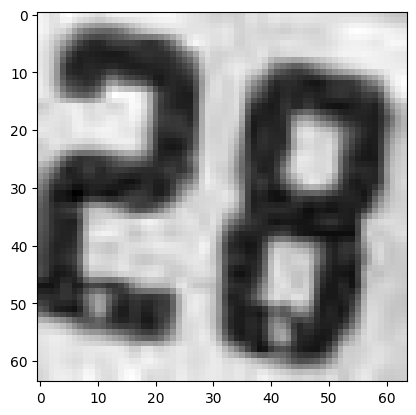

In [129]:
from torchvision.io import read_image
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

img_transforms = transforms.Compose([
        transforms.Grayscale(1),  # (1,h,w)
        transforms.Resize((64,64)),

        transforms.Normalize((0.3150,), (0.2218,)) ,
        # transforms.ToPILImage(), # permute w and h  -> (w,h)
    ])
img_path = "data/jersey-2023-cleaned-crop/challenge/images/3/3_13.jpg"
# img_path = "mnist/custom_datasets/test/37/24_37.png"
# img_path = "mnist/custom_datasets/train/06/4_06.png"
img = read_image(img_path)  # (3, h, w)
img = img.float()
img = img_transforms(img) # (64,64)
print(img.shape, img.dtype)
plt.imshow(img.permute(1,2,0), cmap='gray')  # plt read h, w




In [130]:
output = model(img)

In [131]:
output, torch.argmax(output[:,:], dim=1), output.shape

(tensor([[ -160.7404, -2302.2861,  -810.5717,     0.0000, -1170.6609, -2240.9189,
          -1061.4299, -2095.1890,  -879.7993, -1766.3032, -2410.9290, -2653.3025,
          -2725.2886, -1585.4907, -2248.5229, -2218.0361, -2201.3950, -1516.0544,
          -1524.5986,  -973.5259, -1695.4978, -2120.9897, -1868.3141,  -896.7771,
          -1439.8926, -1578.7073, -1577.8987,  -785.5858,  -641.1530,  -474.7394,
          -1414.4923, -1719.2859, -1179.8123,  -574.8937,  -813.6467, -1239.5929,
           -719.3044,  -645.3015,  -291.6746, -2171.2959, -2624.2493, -2864.2539,
          -2766.1040, -2581.0591, -2452.5127, -1840.1152, -2202.4258, -1994.8646,
          -1604.2788, -1763.3311, -2335.9968, -2452.8696, -2677.8540, -1604.0736,
          -1965.9182, -1869.7167, -2100.2676, -1765.6462, -1547.1036, -2512.9236,
          -2675.8823, -3401.4561, -3216.5186, -2357.4998, -2635.5100, -2668.2007,
          -2485.3896, -2236.9629, -1857.7906, -1796.4867, -2024.4519, -2568.5876,
          -2496.